In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

filepath = '/Users/forrest/Documents/CRAWLAB-Student-Code/Forrest Montgomery/CDPM/Motion_Calculations/csv_workspace/'
# filepath = '/Users/forrest/Documents/CRAWLAB-Student-Code/Forrest Montgomery/CDPM/Motion_Calculations/CSV/'

In [ ]:
n=400
amps = np.array([(0,0)])
percent = np.array([0])
for i in range(n):
    resp = np.genfromtxt(filepath+'response'+str(i)+'.csv', delimiter=',')
    shaped = np.genfromtxt(filepath+'response_s'+str(i)+'.csv', delimiter=',')

    R_amount_shaped = np.sqrt(((shaped[:,0] + 3 * np.sin(shaped[:,2])) - 10)**2 +
           ((shaped[:,1] + 3 * np.cos(shaped[:,2])) - 7.5)**2)

    R_amount_unshaped = np.sqrt(((resp[:,0] + 3 * np.sin(resp[:,2])) - 10)**2 +
           ((resp[:,1] + 3 * np.cos(resp[:,2])) - 7.5)**2)
    
    itemindex = np.where(R_amount_shaped <= 3)
    itemindex_resp = np.where(R_amount_unshaped <= 3)

    shaped_ends = itemindex[:1][0][0]
    shaped_final = R_amount_shaped[shaped_ends:]
    shaped_index = np.argsort(shaped_final)
    shaped_max, shaped_2max = shaped_final[shaped_index][::-1][:2][0:2]
    beta_shaped_amp = np.abs(shaped_max - shaped_2max)
    
    unshaped_ends = itemindex[:1][0][0]
    unshaped_final = R_amount_shaped[unshaped_ends:]
    unshaped_index = np.argsort(unshaped_final)
    unshaped_max, unshaped_2max = unshaped_final[unshaped_index][::-1][:2][0:2]
    beta_amp = np.abs(unshaped_max - unshaped_2max)
#     unshaped_ends = itemindex_resp[:1][0][0]
    
#     beta_max = np.abs(np.max(R_amount_unshaped[unshaped_ends:]))
#     beta_min = np.abs(np.min(R_amount_unshaped[unshaped_ends:]))
#     beta_amp = np.abs(beta_max - beta_min)

#     beta_shaped_max = np.abs(np.max(shaped[:,2][shaped_ends:]))
#     beta_shaped_min = np.abs(np.min(shaped[:,2][shaped_ends:]))
#     beta_shaped_amp = np.abs(beta_shaped_max - beta_shaped_min)

    percent_vib = (beta_shaped_amp / beta_amp) * 100
    amps = np.append(amps, [(beta_amp, beta_shaped_amp)], axis=0)
    percent = np.append(percent, [percent_vib])
    percent = np.nan_to_num(percent)
amps = amps[1:,:]
percent = percent[1:]

In [ ]:
n=400
amps = np.array([(0,0)])
percent = np.array([0])
for i in range(n):
    resp = np.genfromtxt(filepath+'response'+str(i)+'.csv', delimiter=',')
    shaped = np.genfromtxt(filepath+'response_s'+str(i)+'.csv', delimiter=',')

    # Creating the R distance
    R_amount_shaped = np.sqrt(((shaped[:,0] + 3 * np.sin(shaped[:,2])) - 10)**2 +
           ((shaped[:,1] + 3 * np.cos(shaped[:,2])) - 10.5)**2)

    R_amount_unshaped = np.sqrt(((resp[:,0] + 3 * np.sin(resp[:,2])) - 10)**2 +
           ((resp[:,1] + 3 * np.cos(resp[:,2])) - 10.5)**2)

    # Getting the index where X is equal to 10 (which is where the command ends)
    itemindex = np.where(shaped[:,0] <= 10)
    itemindex_resp = np.where(resp[:,0] <= 10)

    # Removing the transient information from the response
    new_shaped = np.abs(R_amount_shaped[itemindex[0][0]:] - 3)
    new_unshaped = np.abs(R_amount_unshaped[itemindex_resp[0][0]:] - 3)

    # Finding the largest and 2nd largest values of residual vibration 
    new_shaped_index = np.argsort(new_shaped)
    shaped_max, shaped_2max = new_shaped[new_shaped_index][::-1][:2][0:2]
    new_unshaped_index = np.argsort(new_unshaped)
    unshaped_max, unshaped_2max = new_unshaped[new_unshaped_index][::-1][:2][0:2]

    # Creating the amplitudes
    shaped_amp = np.abs(shaped_max - shaped_2max)
    unshaped_amp = np.abs(unshaped_max - unshaped_2max)

    # Creating the percent vibration
    percent_vib = (shaped_amp / unshaped_amp) * 100
    amps = np.append(amps, [(unshaped_amp, shaped_amp)], axis=0)
    percent = np.append(percent, [percent_vib])
    percent = np.nan_to_num(percent)
amps = amps[1:,:]
percent = percent[1:]

In [ ]:
resp = np.genfromtxt(filepath+'response'+str(103)+'.csv', delimiter=',')
shaped = np.genfromtxt(filepath+'response_s'+str(103)+'.csv', delimiter=',')

# Creating the R distance
R_amount_shaped = np.sqrt(((shaped[:,0] + 3 * np.sin(shaped[:,2])) - 10)**2 +
       ((shaped[:,1] + 3 * np.cos(shaped[:,2])) - 10.5)**2)

R_amount_unshaped = np.sqrt(((resp[:,0] + 3 * np.sin(resp[:,2])) - 10)**2 +
       ((resp[:,1] + 3 * np.cos(resp[:,2])) - 10.5)**2)

# Getting the index where R is equal to 3 (which is where the command ends)
itemindex = np.where(shaped[:,0] <= 10)
itemindex_resp = np.where(resp[:,0] <= 10)

# Removing the transient information from the response
new1_shaped = R_amount_shaped[itemindex[0][0]:]
new1_unshaped = R_amount_unshaped[itemindex_unshaped[0][0]:]
shaped_max = np.min(new1_shaped)
t = np.linspace(0.0, 1000, 1000)
plt.plot(t, R_amount_shaped)
plt.plot(t, R_amount_unshaped)
plt.plot(new1_shaped)
plt.ylim(-1,7)

In [4]:
n=400
amps = np.array([(0,0)])
percent = np.array([0])
for i in range(n):
    resp = np.genfromtxt(filepath+'response'+str(i)+'.csv', delimiter=',')
    shaped = np.genfromtxt(filepath+'response_s'+str(i)+'.csv', delimiter=',')

    # Creating the R distance
    R_amount_shaped = np.sqrt(((shaped[:,0] + 3 * np.sin(shaped[:,2])) - 10)**2 +
           ((shaped[:,1] + 3 * np.cos(shaped[:,2])) - 10.5)**2)

    R_amount_unshaped = np.sqrt(((resp[:,0] + 3 * np.sin(resp[:,2])) - 10)**2 +
           ((resp[:,1] + 3 * np.cos(resp[:,2])) - 10.5)**2)

    # Getting the index where R is equal to 3 (which is where the command ends)
    if shaped[:,0][1] <= 10:
        itemindex = np.where(shaped[:,0] >= 10)
    else:
        itemindex = np.where(shaped[:,0] <= 10)

    if resp[:,0][1] <= 10:
        itemindex_unshaped = np.where(resp[:,0] >= 10)
    else:
        itemindex_unshaped = np.where(resp[:,0] <= 10)

#     shaped_ends = itemindex[:1][0][0]

#     unshaped_ends = itemindex_resp[:1][0][0]

    # Removing the transient information from the response
    new1_shaped = R_amount_shaped[itemindex[0][0]:]
    new1_unshaped = R_amount_unshaped[itemindex_unshaped[0][0]:]
    shaped_max = np.max(new1_shaped)
    unshaped_max = np.max(new1_unshaped)

#     itemindex = np.where(new1_shaped >= 3)
#     itemindex_unshaped = np.where(new1_unshaped >= 3)
#     new2_shaped = np.abs(new1_shaped[itemindex[0][0]:])
#     new2_unshaped = np.abs(new1_unshaped[itemindex_unshaped[0][0]:])
#     shaped_2max = np.max(new1_shaped)
#     unshaped_2max = np.max(new1_unshaped)

    # Finding the largest and 2nd largest values of residual vibration 
    # new_shaped_index = np.argsort(new_shaped)
    # shaped_max, shaped_2max = new_shaped[new_shaped_index][::-1][:2][0:2]
    # new_unshaped_index = np.argsort(new_unshaped)
    # unshaped_max, unshaped_2max = new_unshaped[new_unshaped_index][::-1][:2][0:2]

    # Creating the amplitudes
#     shaped_amp = np.abs(shaped_max - shaped_2max)
#     unshaped_amp = np.abs(unshaped_max - unshaped_2max)

    # Creating the percent vibration
    percent_vib = (shaped_max / unshaped_max) * 100
#     amps = np.append(amps, [(unshaped_amp, shaped_amp)], axis=0)
    percent = np.append(percent, [percent_vib])
    # percent = np.nan_to_num(percent)
amps = amps[1:,:]
percent = percent[1:]

In [ ]:
n=400
amps = np.array([(0,0)])
percent = np.array([0])
for i in range(n):
    resp = np.genfromtxt(filepath+'response'+str(i)+'.csv', delimiter=',')
    shaped = np.genfromtxt(filepath+'response_s'+str(i)+'.csv', delimiter=',')

    if shaped[:,0][1] <= 10:
        itemindex = np.where(shaped[:,0] >= 10)
    else:
        itemindex = np.where(shaped[:,0] <= 10)

    if resp[:,0][1] <= 10:
        itemindex_resp = np.where(resp[:,0] >= 10)
    else:
        itemindex_resp = np.where(resp[:,0] <= 10)

    shaped_ends = itemindex[:1][0][0]

    unshaped_ends = itemindex_resp[:1][0][0]

    beta_new = resp[:,2][unshaped_ends:]
    index_pos = np.where(beta_new > 0)
    index_neg = np.where(beta_new < 0)
    
    max1 = np.max(np.abs(beta_new[index_pos[0][0]:]))
    max2 = np.max(np.abs(beta_new[index_neg[0][0]:]))
    
    beta_newsh = resp[:,2][shaped_ends:]
    index_pos = np.where(beta_newsh > 0)
    index_neg = np.where(beta_newsh < 0)
    
    max1sh = np.max(np.abs(beta_newsh[index_pos[0][0]:]))
    max2sh = np.max(np.abs(beta_newsh[index_neg[0][0]:]))
    
    beta_amp = np.abs(max1 - max2)
    beta_shaped_amp = np.abs(max1sh - max2sh)
#     beta_max = np.abs(np.max(resp[:,2][unshaped_ends:]))
#     beta_min = np.abs(np.min(resp[:,2][unshaped_ends:]))
#     beta_amp = np.abs(beta_max - beta_min)

#     beta_shaped_max = np.abs(np.max(shaped[:,2][shaped_ends:]))
#     beta_shaped_min = np.abs(np.min(shaped[:,2][shaped_ends:]))
#     beta_shaped_amp = np.abs(beta_shaped_max - beta_shaped_min)

    percent_vib = (beta_shaped_amp / beta_amp) * 100
    amps = np.append(amps, [(beta_amp, beta_shaped_amp)], axis=0)
    percent = np.append(percent, [percent_vib])
    percent = np.nan_to_num(percent)
amps = amps[1:,:]
percent = percent[1:]

In [5]:
def circle(radius, count):
    '''
    This will take a radius and an amount of points, and create coordinates around
    the center point (10, 7.5). So the radius cannot be larger than 7.5.
    '''
    coord = np.array([(10 + radius, 7.5)])
    origin = np.array([(10, 7.5)])
    circumfrence = 2 * np.pi * radius
    amount = circumfrence / count
    n = count
    theta = amount / radius
    for i in range(n):
        y = 7.5 - radius * np.sin(theta*i)
        x = 10 + radius * np.cos(theta*i)
        coord = np.append([(x,y)], coord, axis=0)
    coord = np.reshape(coord, [count+1, 2])
    coord = coord[:n]
    return coord

X_and_Y_points = 20

X = np.linspace(1.0, 19.0, num=X_and_Y_points)
Y = np.linspace(1.0, 14.0, num=X_and_Y_points)
n = X_and_Y_points
dims=np.array((0,0))
for i in range(n):
    x_i = np.repeat(X[i],n)
    total = np.column_stack((x_i,Y))
    dims = np.vstack((dims,total))
dims = dims[1:]

############## Variables to Change #########################

radius_of_circle = 4

number_of_points = 20

# points = circle(radius_of_circle, number_of_points)
points = dims

In [ ]:
itemindex_resp = np.where(percent >= 100)
new = np.delete(percent, itemindex_resp)
new_dimsx = np.delete(dims[:,0], itemindex_resp)
new_dimsy = np.delete(dims[:,1], itemindex_resp)
points = np.column_stack((new_dimsx, new_dimsy))

In [ ]:
# labels = ['point{0}'.format(i) for i in range(number_of_points)]
# plt.scatter(points[:,0], points[:,1])
# plt.scatter(10, 7.5)
# plt.axes().set_aspect('equal', 'datalim')
# for label, x, y in zip(labels, points[:, 0], points[:, 1]):
#     plt.annotate(label, xy = (x, y))
#         textcoords = 'offset points', ha = 'right', va = 'bottom',
#         bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#         arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [ ]:
np.shape(points)

In [ ]:
plt.figure(0)
plt.plot(new)
# plt.plot(t, shaped[:,0])
plt.title('Percent Vibration')
plt.xlabel('Move Number')
plt.ylabel('Percent Vibration')
plt.show()

plt.figure(1)
plt.plot(amps[:,0], label='Unshaped')
plt.plot(amps[:,1], label='Shaped')
plt.title('Total Amplitude after Command')
plt.legend()
plt.xlabel('Move Number')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
resp = np.genfromtxt(filepath+'response'+str(5)+'.csv', delimiter=',')
shaped = np.genfromtxt(filepath+'response_s'+str(5)+'.csv', delimiter=',')

In [ ]:
plt.plot(t, resp[:,2])

In [ ]:
plt.plot(t, shaped[:,2])

In [ ]:
amps = np.array([(0,0)])
percent = np.array([0])
if shaped[:,0][1] >= 10:
    itemindex = np.where(shaped[:,0] <= 10)
else:
    itemindex = np.where(shaped[:,0] >= 10)

if resp[:,0][1] >= 10:
    itemindex_resp = np.where(resp[:,0] <= 10)
else:
    itemindex_resp = np.where(resp[:,0] >= 10)

shaped_ends = itemindex[:1][0][0]

unshaped_ends = itemindex_resp[:1][0][0]

beta_max = np.abs(np.max(resp[:,2][unshaped_ends:]))
beta_min = np.abs(np.min(resp[:,2][unshaped_ends:]))
beta_amp = np.abs(beta_max - beta_min)

beta_shaped_max = np.abs(np.max(shaped[:,2][shaped_ends:]))
beta_shaped_min = np.abs(np.min(shaped[:,2][shaped_ends:]))
beta_shaped_amp = np.abs(beta_shaped_max - beta_shaped_min)

percent_vib = (beta_shaped_amp / beta_amp) * 100
amps = np.append(amps, [(beta_amp, beta_shaped_amp)], axis=0)
percent = np.append(percent, [percent_vib])
percent = np.nan_to_num(percent)

In [ ]:
plt.plot(shaped[:,0])

In [ ]:
percent

In [ ]:
# import numpy as np
# from matplotlib.pyplot import *             # Grab MATLAB plotting functions
# from mpl_toolkits.mplot3d import Axes3D     # 3D plotting functions
# from scipy.interpolate import griddata      # interpolate package's griddate function is better


# # Example data so that code will show a plot... 
# # It's best to remove and fill in your own
# x = points[:,0]
# y = points[:,1]

# z = new
    

# # This function will take x and y arrays and create matrices from them
# #   If X is shape (N,) or (N,1) and y is shape (M,) or (M,1), then 
# #   x_grid and y_grid will be (M, N)
# x_grid, y_grid = np.meshgrid(x, y)


# heights = griddata((x, y),z,(x_grid, y_grid),method='nearest')

# fig = figure(figsize=(9,6))
# subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
# ax = Axes3D(fig)


# surf = ax.plot_surface(x_grid, y_grid, heights, linewidth=0, alpha=0.85,cmap=cm.bwr)
# # cset = ax.contourf(x_grid, y_grid, heights, zdir='z', offset= 0, cmap=cm.bwr)
# # cset = ax.contour(x_grid, y_grid, heights, zdir='x', offset= np.max(x), cmap=cm.gray)
# # cset = ax.contour(x_grid, y_grid, heights, zdir='y', offset=1.5*np.max(y), cmap=cm.gray)


# # adjusts the padding around the 3D plot
# ax.dist = 11

# # Change the colorbar font
# color_bar = colorbar(surf,shrink=0.5,aspect=8)
# cbytick_obj = getp(color_bar.ax.axes, 'yticklabels')
# setp(cbytick_obj, family='CMUSerif-Roman',fontsize=18)

# # Export to svg for final edits in iDraw
# # savefig('3D_plot.svg')
# show()

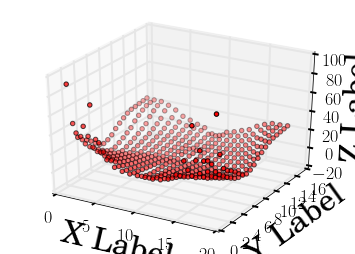

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# data = np.genfromtxt('300.txt')
x = dims[:,0]
y = dims[:,1]
z = percent
p = ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

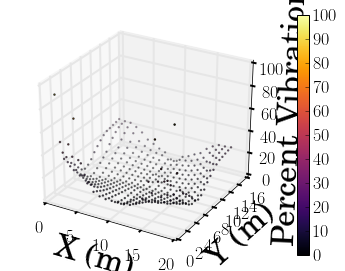

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plt.gca().patch.set_facecolor('white')
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('inferno')
x = points[:,0]
y = points[:,1]
z = percent
# z = new

sc = ax.scatter(x,y,z, c=z, vmin=0, vmax=100, s=2, cmap=cm)
# zaxisvalues0= [0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# for i,j,k,h in zip(x,y,z-1.4,zaxisvalues0):
#     ax.plot([i,i],[j,j],[k,h],color = 'black')

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Percent Vibration')
ax.set_zlim(0, 100)
plt.colorbar(sc)
# ax.view_init(elev=9, azim=-137)
plt.savefig('Files2.svg', format='svg')
plt.show()

In [ ]:
# fig = plt.figure(figsize=(6,6))
# ax = fig.add_subplot(111)
# ax.set_title("X vs Y AVG",fontsize=14)
# ax.set_xlabel("XAVG",fontsize=12)
# ax.set_ylabel("YAVG",fontsize=12)
# ax.grid(True,linestyle='-',color='0.75')
# x = points[:,0]
# y = points[:,1]
# z = new
# plt.axes().set_aspect('equal', 'datalim')
# # scatter with colormap mapping to z value
# ax.scatter(x,y,s=20,c=z, marker = 'o', cmap = cm.jet );
# plt.show()

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


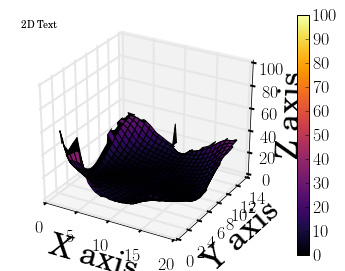

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# data = np.genfromtxt('300.txt')
x = dims[:,0]
y = dims[:,1]
z = percent

xi = np.linspace(min(x), max(x))
yi = np.linspace(min(y), max(y))

X, Y = np.meshgrid(xi, yi)
Z = griddata(x, y, z, xi, yi)

surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=cm.inferno,
                       linewidth=1, antialiased=True)

surf.set_clim(vmin=0, vmax=100)
ax.set_zlim3d(0, 100)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
fig.colorbar(surf)
ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [ ]:
x = points[:,0]
y = points[:,1]
z = new

ax[0].tripcolor(x,y,z)
ax[0].plot(x,y, 'ko ')
# plt.savefig('test.png')
plt.show()

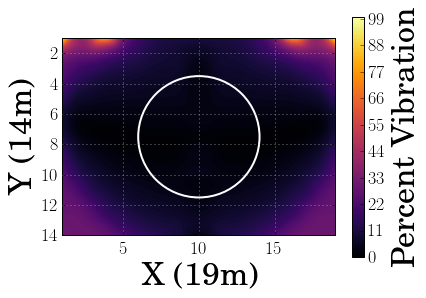

In [16]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
import matplotlib.patches as patches
# make up some randomly distributed data
# seed(1234)
fig = plt.figure()
npts = 200
x = dims[:,0]
y = dims[:,1]
z = percent
# define grid.
xi = np.linspace(1,19,100)
yi = np.linspace(1,14,100)

cm = plt.cm.get_cmap('inferno')
# grid the data.
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
levels = np.linspace(0, 100, 101)
# contour the gridded data, plotting dots at the randomly spaced data points.
# CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,200,cmap=cm, levels=levels)

ax = fig.add_subplot(1, 1, 1)
circle = plt.Circle((10,7.5), 4, edgecolor="white",fill=False, lw=2)
ax.add_patch(circle)


color = plt.colorbar() # draw colorbar
# color.ax.set_title(r'Percent Vibration')
color.set_label(r'Percent Vibration')

    
# Set the plot size - 3x2 aspect ratio is best
# fig = plt.figure(figsize=(6, 4))
# ax = plt.gca()
# plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# csfont = {'fontname':'CMU Serif'}
# Change the axis units to serif
# plt.setp(ax.get_ymajorticklabels(), fontsize=18)
# plt.setp(ax.get_xmajorticklabels(), fontsize=18)

# # Remove top and right axes border
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')

# # Only show axes ticks on the bottom and left axes
# # ax.xaxis.set_ticks_position('bottom')
# # ax.yaxis.set_ticks_position('left')

# # Turn on the plot grid and set appropriate linestyle and color
# ax.grid(True,linestyle=':', color='0.75')
# ax.set_axisbelow(True)

# # Adjust the page layout filling the page using the new tight_layout command
# plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('X_motion_shaped.pdf')

# fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook    
    

# plot data points.
# plt.scatter(x,y,marker='o',c='b',s=5)
plt.xlim(1,19)
plt.ylim(14,1)
# plt.title('griddata test (%d points)' % npts)
ax.set_xlabel(r'X (19m)')
ax.set_ylabel(r'Y (14m)')
# ax.set_zlabel('Percent Vibration')
plt.axes().set_aspect('equal')
plt.savefig('workspace.svg', format='svg')

plt.show()

In [ ]:
np.min(new)

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import matplotlib.pyplot as plt
# import numpy as np

# n_angles = 36
# n_radii = 8

# # An array of radii
# # Does not include radius r=0, this is to eliminate duplicate points
# radii = np.linspace(0.125, 1.0, n_radii)

# # An array of angles
# angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# # Repeat all angles for each radius
# angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# # Convert polar (radii, angles) coords to cartesian (x, y) coords
# # (0, 0) is added here. There are no duplicate points in the (x, y) plane
# x = np.append(0, (radii*np.cos(angles)).flatten())
# y = np.append(0, (radii*np.sin(angles)).flatten())

# # Pringle surface
# z = np.sin(-x*y)

# fig = plt.figure()
# ax = fig.gca(projection='3d')

# ax.plot_trisurf(x,y,z, cmap=cm.jet, linewidth=0.2)

# plt.show()


In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
from matplotlib.ticker import MultipleLocator
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib import rc
import numpy as np
import sys

rc('font',size=28)
rc('font',family='serif')
rc('axes',labelsize=32)

# filename = sys.argv[1]
# data = np.load(filename)
# output = data[171,:,:].flatten()*np.sqrt(2.0)/13074
x = points[:,0]
y = points[:,1]
z = new

bins=30
fig = plt.figure(figsize=(13.5,8))  # PRL default width

ax1 = fig.add_subplot(121, projection='3d')
plt.subplots_adjust(left=0, right=0.90, top=1, bottom=0, wspace=0.22)

hist, xedges, yedges = np.histogram2d(x, y, bins)
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = hist
Z = Z/Z.sum() # normalize Z
surf = ax1.plot_surface(X,Y,Z,cstride=1,rstride=1,color="white",shade=False)
contourz = (Z.min()-Z.max())*0.4  # where to put the contours
cset = ax1.contour(X,Y,Z.reshape(X.shape),zdir='z',offset=contourz)
plt.show()

NameError: name 'new' is not defined

In [ ]:
ax2 = fig.add_subplot(122, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins)
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = hist
Z = Z/Z.sum() # normalize Z
surf2 = ax2.plot_surface(X,Y,Z,cstride=1,rstride=1,color="white",shade=False)
contourz2 = (Z.min()-Z.max())*0.4  # where to put the contours
cset2 = ax2.contour(X,Y,Z.reshape(X.shape),zdir='z',offset=contourz2)
plt.show()

In [ ]:
ax1.set_xlabel(r'$x_p$')
ax1.set_ylabel(r'$y_p$')
#ax1.set_zlabel(r'$Q(x_p,y_p)$')
ax1.text(X.min()*1.1, Y.min()*1.1, Z.max()*1.1, r'$Q(x_p,y_p)$')
ax1.xaxis.set_rotate_label(False)
ax1.yaxis.set_rotate_label(False)
ax1.zaxis.set_rotate_label(False)
ax1.set_zlim(contourz,Z.max()*1.1)
ax1.view_init(elev=10, azim=135)
ax1.grid(False)
ax1.xaxis.pane.set_edgecolor('black')
ax1.yaxis.pane.set_edgecolor('black')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.yaxis.set_major_locator(MultipleLocator(5))
ax1.zaxis.set_major_locator(MultipleLocator(0.01))
[t.set_va('center') for t in ax1.get_yticklabels()]
[t.set_ha('left') for t in ax1.get_yticklabels()]
[t.set_va('center') for t in ax1.get_xticklabels()]
[t.set_ha('right') for t in ax1.get_xticklabels()]
[t.set_va('center') for t in ax1.get_zticklabels()]
[t.set_ha('left') for t in ax1.get_zticklabels()]
ax1.xaxis._axinfo['tick']['inward_factor'] = 0
ax1.xaxis._axinfo['tick']['outward_factor'] = 0.4
ax1.yaxis._axinfo['tick']['inward_factor'] = 0
ax1.yaxis._axinfo['tick']['outward_factor'] = 0.4
ax1.zaxis._axinfo['tick']['inward_factor'] = 0
ax1.zaxis._axinfo['tick']['outward_factor'] = 0.4
ax1.zaxis._axinfo['tick']['outward_factor'] = 0.4

ax2.set_xlabel(r'$x_p$',fontsize=32)
ax2.set_ylabel(r'$y_p$')
#ax2.set_zlabel(r'$Q(x_p,y_p)$')
ax2.text(X.min()*1.1, Y.min()*1.1, Z.max()*1.1, r'$Q(x_p,y_p)$')
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.set_zlim(contourz,Z.max()*1.1)
ax2.view_init(elev=10, azim=135)
ax2.grid(False)
ax2.xaxis.pane.set_edgecolor('black')
ax2.yaxis.pane.set_edgecolor('black')
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_major_locator(MultipleLocator(5))
ax2.zaxis.set_major_locator(MultipleLocator(0.01))
[t.set_va('center') for t in ax2.get_yticklabels()]
[t.set_ha('left') for t in ax2.get_yticklabels()]
[t.set_va('center') for t in ax2.get_xticklabels()]
[t.set_ha('right') for t in ax2.get_xticklabels()]
[t.set_va('center') for t in ax2.get_zticklabels()]
[t.set_ha('left') for t in ax2.get_zticklabels()]
ax2.xaxis._axinfo['tick']['inward_factor'] = 0
ax2.xaxis._axinfo['tick']['outward_factor'] = 0.4
ax2.yaxis._axinfo['tick']['inward_factor'] = 0
ax2.yaxis._axinfo['tick']['outward_factor'] = 0.4
ax2.zaxis._axinfo['tick']['inward_factor'] = 0
ax2.zaxis._axinfo['tick']['outward_factor'] = 0.4

#ax.set_xlim(-40, 40)
#ax.set_ylim(-40, 40)
#ax.zaxis.set_major_locator(LinearLocator(3))
#ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
#ax.locator_params(tight=True)
#ax.tick_params(labelsize=30)
#ax.set_xticks([min(x), max(x), 0.0])
#ax.set_yticks([min(y), max(y), 0.0])
#ax.set_zticks([min(Z), max(Z), 0.0])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

# Generate data: for N=1e6, the triangulation hogs 1 GB of memory
x = points[:,0]
y = points[:,1]
z = new
# Set up a regular grid of interpolation points
xi, yi = np.linspace(x.min(), x.max(), 300), np.linspace(y.min(), y.max(), 300)
xi, yi = np.meshgrid(xi, yi)

# Interpolate; there's also method='cubic' for 2-D data such as here
zi = scipy.interpolate.griddata((x, y), z, (xi, yi), method='linear')

cm = plt.cm.get_cmap('RdYlBu')
plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',cmap=cm,
           extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.ylim(15,0)
plt.show()

In [ ]:
import numpy as np

def griddata(x, y, z, binsize=0.01, retbin=True, retloc=True):
    """
    Place unevenly spaced 2D data on a grid by 2D binning (nearest
    neighbor interpolation).

    Parameters
    ----------
    x : ndarray (1D)
        The idependent data x-axis of the grid.
    y : ndarray (1D)
        The idependent data y-axis of the grid.
    z : ndarray (1D)
        The dependent data in the form z = f(x,y).
    binsize : scalar, optional
        The full width and height of each bin on the grid.  If each
        bin is a cube, then this is the x and y dimension.  This is
        the step in both directions, x and y. Defaults to 0.01.
    retbin : boolean, optional
        Function returns `bins` variable (see below for description)
        if set to True.  Defaults to True.
    retloc : boolean, optional
        Function returns `wherebins` variable (see below for description)
        if set to True.  Defaults to True.

    Returns
    -------
    grid : ndarray (2D)
        The evenly gridded data.  The value of each cell is the median
        value of the contents of the bin.
    bins : ndarray (2D)
        A grid the same shape as `grid`, except the value of each cell
        is the number of points in that bin.  Returns only if
        `retbin` is set to True.
    wherebin : list (2D)
        A 2D list the same shape as `grid` and `bins` where each cell
        contains the indicies of `z` which contain the values stored
        in the particular bin.

    Revisions
    ---------
    2010-07-11  ccampo  Initial version
    """
    # get extrema values.
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()

    # make coordinate arrays.
    xi      = np.arange(xmin, xmax+binsize, binsize)
    yi      = np.arange(ymin, ymax+binsize, binsize)
    xi, yi = np.meshgrid(xi,yi)

    # make the grid.
    grid           = np.zeros(xi.shape, dtype=x.dtype)
    nrow, ncol = grid.shape
    if retbin: bins = np.copy(grid)

    # create list in same shape as grid to store indices
    if retloc:
        wherebin = np.copy(grid)
        wherebin = wherebin.tolist()

    # fill in the grid.
    for row in range(nrow):
        for col in range(ncol):
            xc = xi[row, col]    # x coordinate.
            yc = yi[row, col]    # y coordinate.

            # find the position that xc and yc correspond to.
            posx = np.abs(x - xc)
            posy = np.abs(y - yc)
            ibin = np.logical_and(posx < binsize/2., posy < binsize/2.)
            ind  = np.where(ibin == True)[0]

            # fill the bin.
            bin = z[ibin]
            if retloc: wherebin[row][col] = ind
            if retbin: bins[row, col] = bin.size
            if bin.size != 0:
                binval         = np.median(bin)
                grid[row, col] = binval
            else:
                grid[row, col] = np.nan   # fill empty bins with nans.

    # return the grid
    if retbin:
        if retloc:
            return grid, bins, wherebin
        else:
            return grid, bins
    else:
        if retloc:
            return grid, wherebin
        else:
            return grid

In [ ]:
import numpy as np
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt

#-- Read the data.
# I'm going to use `pandas` to read in and work with your data, mostly due to
# the text site names. Using pandas is optional, however.
x = points[:,0]
y = points[:,1]
z = new

#-- Now let's grid your data.
# First we'll make a regular grid to interpolate onto. This is equivalent to
# your call to `mgrid`, but it's broken down a bit to make it easier to
# understand. The "30j" in mgrid refers to 30 rows or columns.
numcols, numrows = 30, 30
xi = np.linspace(x.min(), x.max(), numcols)
yi = np.linspace(y.min(), y.max(), numrows)
xi, yi = np.meshgrid(xi, yi)

#-- Interpolate at the points in xi, yi
# "griddata" expects "raw" numpy arrays, so we'll pass in
# data.x.values instead of just the pandas series data.x
zi = griddata(x, y, z, xi, yi)

#-- Display the results
fig, ax = plt.subplots()
im = ax.contourf(xi, yi, zi)
ax.scatter(x,y, c=z, s=100,
           vmin=zi.min(), vmax=zi.max())
fig.colorbar(im)

plt.show()